# NLP Pipelines
In this lab: spaCy   
Notable other mentions: **NLTK** (next week), **CoreNLP** (a.k.a. Stanford NLP)   
Hungarian specific: **magyarlanc**, other resources: https://github.com/oroszgy/awesome-hungarian-nlp

# Installation
pip install spacy

# Download
English pipeline models:   
python -m spacy download en_core_web_sm   
Details: https://spacy.io/usage/models

In [ ]:
!nvidia-smi

Tue Mar 14 17:33:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Update Spacy for 3.0 functionality (new features), install GPU support for better performance
!pip install -U pip setuptools wheel
!pip install --upgrade 'spacy[cuda120]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m spacy download en_core_web_sm

2023-03-14 17:34:44.497018: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 17:34:45.399523: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-14 17:34:45.399662: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-14 17:34:45.399684: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [ ]:
import spacy
import pandas as pd

# spaCy pipeline schematic

<img src="https://spacy.io/images/pipeline-design.svg">

**Tokenizer**: "segment an input character sequence into
small meaningful units" (Includes sentence splitter)

**Tagger**: "determining Part-of-speech (POS) tags" 

**Parser**: "parsing syntactical dependencies";   
word D depends on word H if:
- D modifies the meaning of H
- D can be omitted from the sentence keeping H (but H cannot be omitted while keeping D)

**Ner**: "the task of finding
expressions in the input text that are naming entities and
tagging them with the corresponding entity type"

**Others**: ?

# Pipeline management

In [ ]:
# Load pipeline

nlp = spacy.load("en_core_web_sm")

In [ ]:
# Check pipeline elements
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [ ]:
# Control loaded elements
nlp = spacy.load("en_core_web_sm", disable=["parser"], exclude=["ner"])
print(nlp.pipe_names)

nlp.enable_pipe("parser")
print(nlp.pipe_names)

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']
['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer']


In [ ]:
# Let's load the full pipeline
# tok2vec - required transformation for neural network based components
# attribute_ruler - handles exception rules, enhances tagger outputs
nlp = spacy.load("en_core_web_sm")
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


# Inference

In [ ]:
text = "Elisabeth grabbed 2 apples and took a bite of each."

doc = nlp(text)
print(doc)

Elisabeth grabbed 2 apples and took a bite of each.


## Document attributes

In [ ]:
#tokenized
for token in doc:
  print(token)

Elisabeth
grabbed
2
apples
and
took
a
bite
of
each
.


In [ ]:
#Token parameters
#Tag ending in _ is a string type reprezentation of a category, without _ usually returns an int
data = \
[( token,         #token string
  token.is_alpha, #contains letters only
  token.is_punct, #punctuation
  token.is_stop,  #stopwords
  token.norm_,    #normailzed form
  token.pos_,     #POS tag
  spacy.explain(token.pos_),
  token.tag_,     #Fine POS tag with morph info
  spacy.explain(token.tag_),
  token.dep_,     #Dependency type
  spacy.explain(token.dep_),
  token.ent_type_, #NER entity
  spacy.explain(token.ent_type_),
  token.lemma_,   #Lemma of the word
  token.morph,    #morphological information
  )for token in doc]

/usr/local/lib/python3.9/dist-packages/spacy/glossary.py:19: UserWarning: [W118] Term '' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


In [ ]:
df = pd.DataFrame(data, columns=["word","isalpha","ispunct","isstop","norm","pos","pos_expl","fine_pos","fine_pos_expl","dep","dep_expl","entity","entity_expl","lemma","morph"])
df

,word,isalpha,ispunct,isstop,norm,pos,pos_expl,fine_pos,fine_pos_expl,dep,dep_expl,entity,entity_expl,lemma,morph
0,Elisabeth,True,False,False,elisabeth,PROPN,proper noun,NNP,"noun, proper singular",nsubj,nominal subject,PERSON,"People, including fictional",Elisabeth,(Number=Sing)
1,grabbed,True,False,False,grabbed,VERB,verb,VBD,"verb, past tense",ROOT,root,,None,grab,"(Tense=Past, VerbForm=Fin)"
2,2,False,False,False,2,NUM,numeral,CD,cardinal number,nummod,numeric modifier,CARDINAL,Numerals that do not fall under another type,2,(NumType=Card)
3,apples,True,False,False,apples,NOUN,noun,NNS,"noun, plural",dobj,direct object,,None,apple,(Number=Plur)
4,and,True,False,True,and,CCONJ,coordinating conjunction,CC,"conjunction, coordinating",cc,coordinating conjunction,,None,and,(ConjType=Cmp)
5,took,True,False,False,took,VERB,verb,VBD,"verb, past tense",conj,conjunct,,None,take,"(Tense=Past, VerbForm=Fin)"
6,a,True,False,True,a,DET,determiner,DT,determiner,det,determiner,,None,a,"(Definite=Ind, PronType=Art)"
7,bite,True,False,False,bite,NOUN,noun,NN,"noun, singular or mass",dobj,direct object,,None,bite,(Number=Sing)
8,of,True,False,True,of,ADP,adposition,IN,"conjunction, subordinating or preposition",prep,prepositional modifier,,None,of,()
9,each,True,False,True,each,PRON,pronoun,DT,determiner,pobj,object of preposition,,None,each,()


## Plot DEP graph

In [ ]:
from spacy import displacy

displacy.render(doc, style="dep", jupyter=True, options={"distance":120, "bg":"transparent", "color":"white"})

In [ ]:
for token in doc:
  print(token.text.ljust(10), "rightmost ancestor chain:", list(token.ancestors))

Elisabeth  rightmost ancestor chain: [grabbed]
grabbed    rightmost ancestor chain: []
2          rightmost ancestor chain: [apples, grabbed]
apples     rightmost ancestor chain: [grabbed]
and        rightmost ancestor chain: [grabbed]
took       rightmost ancestor chain: [grabbed]
a          rightmost ancestor chain: [bite, took, grabbed]
bite       rightmost ancestor chain: [took, grabbed]
of         rightmost ancestor chain: [bite, took, grabbed]
each       rightmost ancestor chain: [of, bite, took, grabbed]
.          rightmost ancestor chain: [grabbed]


# Plot entities

In [ ]:
displacy.render(doc, style="ent", jupyter=True, options={"distance":120, "bg":"transparent", "color":"white"})

# Multiple sentences

In [ ]:
text = "Bob went to the cinema. He watched Titanic with his friends."

doc = nlp(text)
for sent in doc.sents:
  displacy.render(sent, style="dep", jupyter=True, options={"distance":120, "bg":"transparent", "color":"white"})

# Batched pipeline

Working with statistical models, processing text in batches is more efficient.

In [ ]:
#Download a larger text corpus (discussion of the Chinese room problem)
import locale
locale.getpreferredencoding = lambda: "UTF-8"

def download_from_drive(link, filename):
  id = link.split("/")[-2]
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id={id}' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id={id}" -O {"/content/"+filename} && rm -rf /tmp/cookies.txt

download_from_drive("https://drive.google.com/file/d/11ggHFzTXvvRETep7hwYlwyByFEHOLpa6/view?usp=sharing", "source.txt")


--2023-03-14 17:48:50--  https://docs.google.com/uc?export=download&confirm=&id=11ggHFzTXvvRETep7hwYlwyByFEHOLpa6
Resolving docs.google.com (docs.google.com)... 173.194.69.102, 173.194.69.100, 173.194.69.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.69.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-bo-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fuc7v0r38o8emled3k22s6snrk8b8h14/1678816125000/12206003659086370314/*/11ggHFzTXvvRETep7hwYlwyByFEHOLpa6?e=download&uuid=ec817478-61d5-470f-a977-d0d218cf2513 [following]
--2023-03-14 17:48:51--  https://doc-0g-bo-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fuc7v0r38o8emled3k22s6snrk8b8h14/1678816125000/12206003659086370314/*/11ggHFzTXvvRETep7hwYlwyByFEHOLpa6?e=download&uuid=ec817478-61d5-470f-a977-d0d218cf2513
Resolving doc-0g-bo-docs.googleusercontent.com (doc-0g-bo-docs.googleusercontent.com)... 108.177.119.132, 

In [ ]:
with open("./source.txt","r", encoding="utf-8") as f:
  lines = f.readlines()

In [ ]:
print(lines[:2])

['In the original BBS article, Searle identified and discussed several responses to the argument that he had come across in giving the argument in talks at various places. As a result, these early responses have received the most attention in subsequent discussion. What Searle 1980 calls “perhaps the most common reply” is the Systems Reply.\n', 'The Systems Reply (which Searle says was originally associated with Yale, the home of Schank’s AI work) concedes that the man in the room does not understand Chinese. But, the reply continues, the man is but a part, a central processing unit (CPU), in a larger system. The larger system includes the huge database, the memory (scratchpads) containing intermediate states, and the instructions – the complete system that is required for answering the Chinese questions. So the Sytems Reply is that while the man running the program does not understand Chinese, the system as a whole does.\n']


In [ ]:
%%time
#Simple solution

docs = [nlp(line) for line in lines]

CPU times: user 2.22 s, sys: 8.2 ms, total: 2.23 s
Wall time: 2.25 s


In [ ]:
%%time
#Batched solution

docs = list(nlp.pipe(lines))

CPU times: user 892 ms, sys: 63.6 ms, total: 955 ms
Wall time: 954 ms


In [ ]:
%%time
#Batched solution with multiple processes

docs =  list(nlp.pipe(lines, n_process=4))

CPU times: user 121 ms, sys: 141 ms, total: 262 ms
Wall time: 1.93 s


# Custom pipeline component

Let's process questions only

In [ ]:
from spacy.language import Language

questions = []
@Language.component("question_collector")
def my_component(doc):
  for sent in doc.sents:
    if sent[-1].text == "?" and sent[-1].is_sent_end:
      questions.append(sent)
  return doc

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("question_collector", name="print_question", before="lemmatizer")
print(nlp.pipe_names)
docs = list(nlp.pipe(lines))
for question in questions:
  print(question)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'print_question', 'lemmatizer', 'ner']
In his 1989 paper, Harnad writes “Searle formulates the problem as follows: Is the mind a computer program?
Stevan Harnad also finds important our sensory and motor capabilities: “Who is to say that the Turing Test, whether conducted in Chinese or in any other language, could be successfully passed without operations that draw on our sensory, motor, and other higher cognitive capacities as well?
Ex hypothesi the rest of the world will not notice the difference; will Otto?
If so, when?
What physical properties of the brain are important?
In criticism of Searle’s response to the Brain Simulator Reply, Kurzweil says: “So if we scale up Searle’s Chinese Room to be the rather massive ‘room’ it needs to be, who’s to say that the entire system of a hundred trillion people simulating a Chinese Brain that knows Chinese isn’t conscious?
Related to the preceding is The Other Minds Reply: “How do you know tha

# Collect all Person type entities and the number of mentions

In [ ]:
personalMentions={}

@Language.component("person_counter")
def my_component(doc):
  for ent in doc.ents:
    if ent.label_=="PERSON":
      if ent.text in personalMentions.keys():
        personalMentions[ent.text]+=1
      else:
        personalMentions[ent.text]=1
  return doc

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("person_counter", name="person_counter", after="ner")
print(nlp.pipe_names)
docs = list(nlp.pipe(lines))
print(personalMentions)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'person_counter']
{'Ned Block': 2, 'Jack Copeland': 2, 'Daniel Dennett': 4, 'Douglas Hofstadter': 1, 'Jerry Fodor': 3, 'John Haugeland': 2, 'Ray Kurzweil': 2, 'Georges Rey': 3, 'Rey': 5, 'Kurzweil': 1, 'Margaret Boden': 3, 'Boden': 1, 'Clark': 7, 'Chalmers': 2, 'Otto': 7, 'Shaffer': 2, 'Stevan Harnad': 5, 'Harnad': 5, 'Block': 2, 'Virtual Mind': 4, 'Siri': 1, 'Tim Maudlin': 3, 'Maudlin': 3, 'Minsky': 1, 'Perlis': 1, 'Richard Hanley': 1, 'Patrick Hayes': 1, 'Don Perlis': 1, 'Mao': 1, 'Mind and Body': 1, 'Roger Penrose': 1, 'Penrose': 3, 'Kurt Gödel’s': 1, 'Gödel': 1, 'Strong AI': 1, 'Tim Crane': 2, 'Hans Moravec': 2, 'Vat': 1, 'Carter': 1, 'Hilary Putnam': 1, 'David Lewis': 1, 'Yin': 1, 'Yang': 1, 'Turing Test': 1, 'Shakey': 1, 'Helen Keller': 1, 'Margaret Boden 1988': 1, 'Jerry Fodor’s': 1, 'Roger Schank': 1, 'Harnad 2012': 1, 'Ziemke 2016': 1, 'Seligman 2019': 1, 'Paul': 2, 'Patricia Churchland': 2, 'Suppose Otto'

In [ ]:
#Merging last names with full names

keys = list(personalMentions.keys())
splitkeys = {splitkey:key for key in keys for splitkey in key.split(" ") if key.find(" ")>=0}
print(splitkeys)

for key in keys:
  if key.find(" ")<0:
    if key in splitkeys.keys():
      print(key)
      personalMentions[splitkeys[key]] += personalMentions[key]
      personalMentions.pop(key)

{'Ned': 'Ned Block', 'Block': 'Ned Block', 'Jack': 'Jack Copeland', 'Copeland': 'Jack Copeland', 'Daniel': 'Daniel Tammet', 'Dennett': 'contra Dennett', 'Douglas': 'Douglas Hofstadter', 'Hofstadter': 'Douglas Hofstadter', 'Jerry': 'Jerry Fodor’s', 'Fodor': 'Jerry Fodor', 'John': 'John Searle', 'Haugeland': 'John Haugeland', 'Ray': 'Ray Kurzweil', 'Kurzweil': 'Ray Kurzweil', 'Georges': 'Georges Rey', 'Rey': 'Georges Rey', 'Margaret': 'Margaret Boden 1988', 'Boden': 'Margaret Boden 1988', 'Stevan': 'Stevan Harnad', 'Harnad': 'Harnad 2012', 'Virtual': 'Virtual Mind', 'Mind': 'Transcendent Mind', 'Tim': 'Tim Crane', 'Maudlin': 'Tim Maudlin', 'Richard': 'Richard Hanley', 'Hanley': 'Richard Hanley', 'Patrick': 'Patrick Hayes', 'Hayes': 'Patrick Hayes', 'Don': 'Don Perlis', 'Perlis': 'Don Perlis', 'and': 'Mind and Body', 'Body': 'Mind and Body', 'Roger': 'Roger Schank', 'Penrose': 'Roger Penrose', 'Kurt': 'Kurt Gödel’s', 'Gödel’s': 'Kurt Gödel’s', 'Strong': 'Strong AI', 'AI': 'Strong AI', 'Cr

In [ ]:
print(personalMentions)

{'Ned Block': 4, 'Jack Copeland': 2, 'Daniel Dennett': 4, 'Douglas Hofstadter': 1, 'Jerry Fodor': 3, 'John Haugeland': 2, 'Ray Kurzweil': 3, 'Georges Rey': 8, 'Margaret Boden': 3, 'Shaffer': 2, 'Stevan Harnad': 5, 'Virtual Mind': 4, 'Siri': 1, 'Tim Maudlin': 6, 'Minsky': 1, 'Richard Hanley': 1, 'Patrick Hayes': 1, 'Don Perlis': 2, 'Mao': 1, 'Mind and Body': 1, 'Roger Penrose': 4, 'Kurt Gödel’s': 1, 'Gödel': 1, 'Strong AI': 1, 'Tim Crane': 2, 'Hans Moravec': 7, 'Vat': 1, 'Carter': 1, 'Hilary Putnam': 1, 'David Lewis': 1, 'Yin': 1, 'Yang': 1, 'Turing Test': 1, 'Shakey': 1, 'Helen Keller': 1, 'Margaret Boden 1988': 2, 'Jerry Fodor’s': 1, 'Roger Schank': 1, 'Harnad 2012': 6, 'Ziemke 2016': 1, 'Seligman 2019': 1, 'Patricia Churchland': 2, 'Suppose Otto': 8, 'John Searle': 1, 'Steven Pinker': 4, 'Scientific American': 1, 'Andy Clark': 8, 'William Lycan': 1, 'Terry Horgan': 1, 'Daniel Tammet': 1, 'Intentionality': 1, 'Transcendent Mind': 1, 'Minds': 1, 'trumps': 1, 'Hauser': 1, 'Wakefield': 1

# Using Pandas with spaCy pipelines

"normalize" text

In [ ]:
download_from_drive("https://drive.google.com/file/d/1Oti4rfwPJcd4S79GOvzZPP9OCO7shnAd/view?usp=sharing", "winemag-data-130k-v2.json")

df = pd.read_json("winemag-data-130k-v2.json")

--2023-03-14 18:00:43--  https://docs.google.com/uc?export=download&confirm=&id=1Oti4rfwPJcd4S79GOvzZPP9OCO7shnAd
Resolving docs.google.com (docs.google.com)... 142.251.31.139, 142.251.31.101, 142.251.31.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.31.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-1k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3vdjl40ga89877rmk7j9kshvm0f2i004/1678816800000/02440328774490686871/*/1Oti4rfwPJcd4S79GOvzZPP9OCO7shnAd?e=download&uuid=9d7ddd75-78c6-4789-bbde-bac5dfd58555 [following]
--2023-03-14 18:00:46--  https://doc-0o-1k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3vdjl40ga89877rmk7j9kshvm0f2i004/1678816800000/02440328774490686871/*/1Oti4rfwPJcd4S79GOvzZPP9OCO7shnAd?e=download&uuid=9d7ddd75-78c6-4789-bbde-bac5dfd58555
Resolving doc-0o-1k-docs.googleusercontent.com (doc-0o-1k-docs.googleusercontent.com)... 108.177.119.132, 

In [ ]:
df.head()

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,NaN,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   points                 129971 non-null  int64  
 1   title                  129971 non-null  object 
 2   description            129971 non-null  object 
 3   taster_name            103727 non-null  object 
 4   taster_twitter_handle  98758 non-null   object 
 5   price                  120975 non-null  float64
 6   designation            92506 non-null   object 
 7   variety                129970 non-null  object 
 8   region_1               108724 non-null  object 
 9   region_2               50511 non-null   object 
 10  province               129908 non-null  object 
 11  country                129908 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [ ]:
nlp = spacy.load("en_core_web_sm", disable=["ner","parser"])

Using 20k only to keep computation times low

In [ ]:
df = df[:20000]

- Computation as a single block so spaCy can batch efficiently
- Filtering as an apply function

In [ ]:
%%time
df["doc"] = list(nlp.pipe(df["description"], batch_size=256))

CPU times: user 56.8 s, sys: 390 ms, total: 57.1 s
Wall time: 57.4 s


In [ ]:
def prepare_text(doc):
  filtered_list = []
  for token in doc:
    if token.is_alpha and not token.is_stop and not token.is_punct:
      filtered_list.append(token.lemma_.lower())
    
  return " ".join(filtered_list)

In [ ]:
df["normalized_text"] = df["doc"].apply(prepare_text)

In [ ]:
df["price"] = df["price"].fillna(df["price"].mean())

In [ ]:
with pd.option_context('display.max_colwidth', None):
  display(df[["description","normalized_text","price"]])

,description,normalized_text,price
0,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",aromas include tropical fruit broom brimstone dry herb palate overly expressive offer unripened apple citrus dry sage alongside brisk acidity,35.230649
1,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",ripe fruity wine smooth structure firm tannin fill juicy red berry fruit freshen acidity drinkable certainly well,15.000000
2,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",tart snappy flavor lime flesh rind dominate green pineapple poke crisp acidity underscore flavor wine stainless steel ferment,14.000000
3,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",pineapple rind lemon pith orange blossom start aroma palate bit opulent note honey drizzle guava mango give way slightly astringent semidry finish,13.000000
4,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",like regular bottling come rough tannic rustic earthy herbal characteristic nonetheless think pleasantly unfussy country wine good companion hearty winter stew,65.000000
...,...,...,...
19995,"This small production (200 cases) Pinot Noir is a mix of older and younger estate vines, a selection of lots given 22 months in 60 and 132 gallon French oak casks. It's still tasting quite young, sharp and chewy, with spicy fruit backed up against earthy tannins. Give it plenty of breathing time.",small production case pinot noir mix old young estate vine selection lot give month gallon french oak cask taste young sharp chewy spicy fruit back earthy tannin plenty breathing time,38.000000
19996,"Tart and forward, with cranberry and raspberry fruit front and center, this is a tasty, acidic and lightly spicy effort that shows some nice precision. It's not a big wine, but balanced and based upon sharp acids that carry the fruit and cut through the finish.",tart forward cranberry raspberry fruit center tasty acidic lightly spicy effort show nice precision big wine balanced base sharp acid carry fruit cut finish,20.000000
19997,"Nothing subtle about this big, ripe, oaky Chardonnay. It shows the tropical fruit richness of a fine Alexander Valley Chard, flamboyant in pineapple custard flavor, with a flinty minerality. The sweet overlay of smoky oak is perfectly in keeping with the wine's volume.",subtle big ripe oaky chardonnay show tropical fruit richness fine alexander valley chard flamboyant pineapple custard flavor flinty minerality sweet overlay smoky oak perfectly keep wine volume,32.000000
19998,"Winemaker Nick Goldschmidt has turned out a Shiraz that seems a bit conflicted. It's only medium-bodied, yet packs in overripe flavors of cooked berries laced with dark chocolate and espresso. The peppery notes on the finish give it enough verve to pair with steaks or burgers.",winemaker nick goldschmidt turn shiraz bit conflicted medium bodied pack overripe flavor cook berry lace dark chocolate espresso peppery note finish verve pair steak burger,25.000000


# Exploring some basic data connections

How does the average length of the words (lemmas) used to describe the product affect the price?

In [ ]:
df["avg_lemma_len"] = df["normalized_text"].apply(lambda x: len(x)/len(x.split(" ")))

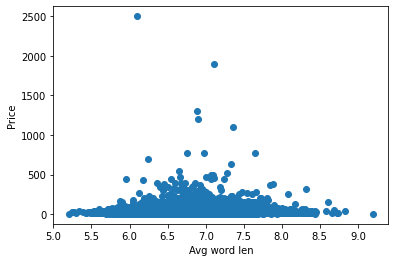

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df["avg_lemma_len"],df["price"])
plt.xlabel("Avg word len")
plt.ylabel("Price");

In [ ]:
import numpy as np

stepnum = 15
steps = np.linspace(5,10,stepnum)

bin_center = np.zeros(stepnum-1)
bin_avg_price = np.zeros(stepnum-1)

for i in range(stepnum-1):
  bin_center[i] = (steps[i]+steps[i+1])/2.0
  bin_avg_price[i] = df["price"][(df["avg_lemma_len"]>=steps[i]) & (df["avg_lemma_len"]<steps[i+1])].median()

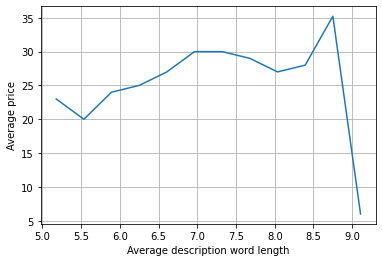

In [ ]:
plt.plot(bin_center, bin_avg_price)
plt.xlabel("Average description word length")
plt.ylabel("Average price")
plt.grid()

Could the extreme values cause this change? What measure to use then?


(median)